<a href="https://colab.research.google.com/github/sabumjung/Machine-Learning-Algorithm/blob/master/ch07_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 분류

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [0]:
# For reproducibility
np.random.seed(1000)

nb_samples = 500

In [0]:
def show_dataset(X, Y):
    fig, ax = plt.subplots(1, 1, figsize=(30, 25))

    ax.grid()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    for i in range(nb_samples):
        if Y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], marker='o', color='r')
        else:
            ax.scatter(X[i, 0], X[i, 1], marker='^', color='b')

    plt.show()

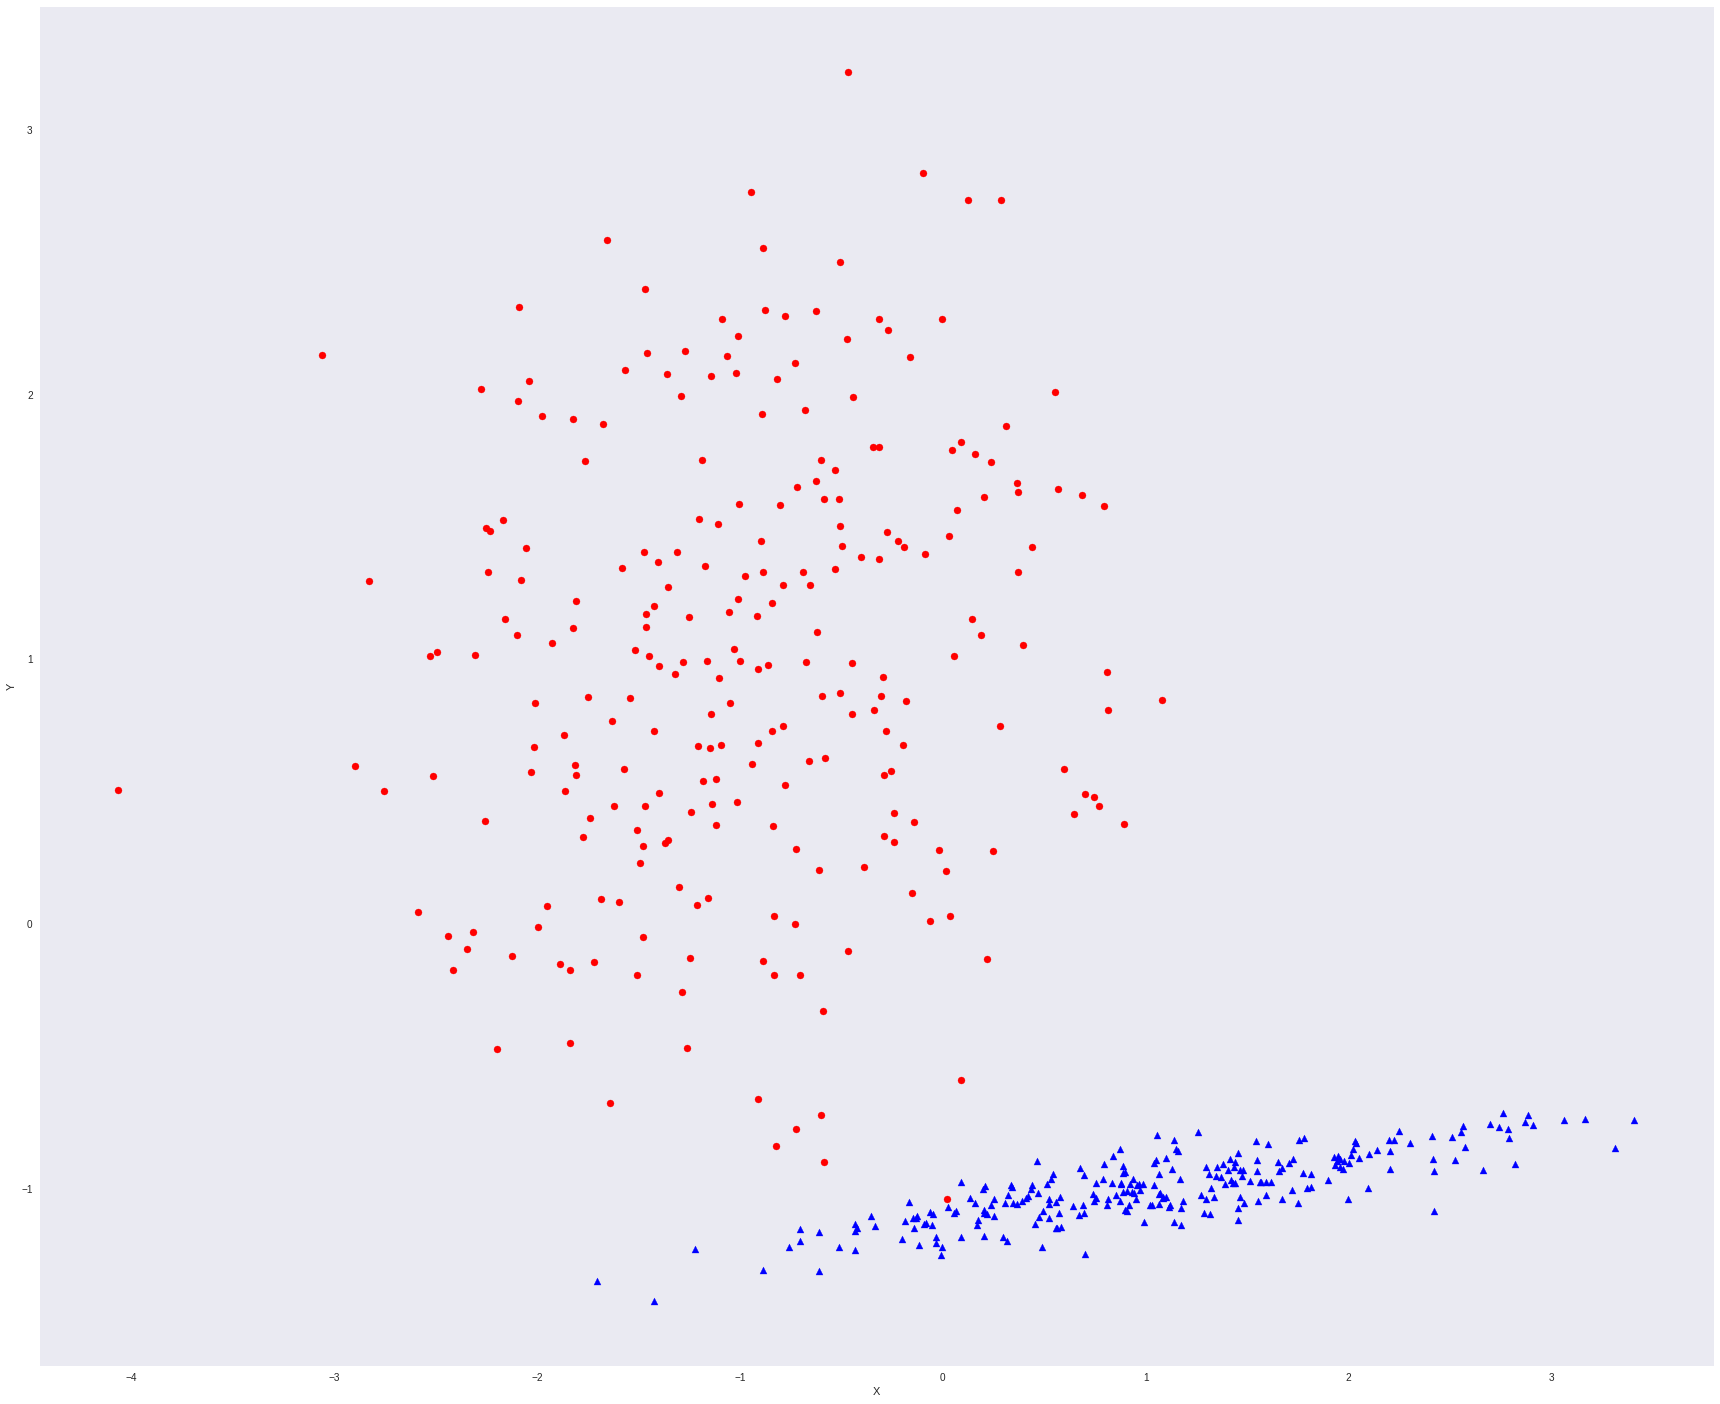

In [30]:
# Create dataset
X, Y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1)
# Show dataset
show_dataset(X, Y)

In [31]:
# Create a SVM with linear kernel
svc = SVC(kernel='linear')

# Compute CV score
svc_scores = cross_val_score(svc, X, Y, scoring='accuracy', cv=10)
print('Linear SVM CV average score: %.3f' % svc_scores.mean())

Linear SVM CV average score: 0.990
